In [158]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.pyplot as plt

df = pd.read_csv('Pizza.csv')

In [159]:
dfAB = df[(df['brand']=='A') | (df['brand']=='B')]
X = dfAB.iloc[:, 2:]
Y = dfAB.iloc[:, 0]
Y = Y.map({'A':1, 'B':-1})
X_train = X.to_numpy()
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, Y)
wAB, bAB = svm.coef_, svm.intercept_

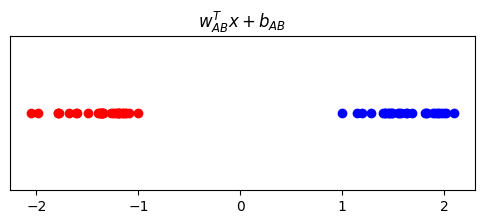

In [160]:
data = (X @ wAB.T + bAB).to_numpy()
classA = data[:29]
classB = data[29:]
# 创建一个图形
plt.figure(figsize=(6, 2))

# 在数轴上用蓝色的点画出这些值
plt.scatter(classA, [0]*len(classA), color='blue')
plt.scatter(classB, [0]*len(classB), color='red')

# 设置y轴的显示范围，这里只显示x轴，所以设置为很小的一个区间
plt.ylim(-1, 1)

# 可选：隐藏y轴的标签和刻度线
plt.yticks([])
plt.title('$w_{AB}^T x + b_{AB}$')

# 显示图形
plt.savefig('1aAB.png', bbox_inches='tight')

In [161]:
dfAC = df[(df['brand']=='A') | (df['brand']=='C')]
X = dfAC.iloc[:, 2:]
Y = dfAC.iloc[:, 0]
Y = Y.map({'A':1, 'C':-1})
X_train = X.to_numpy()
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, Y)
wAC, bAC = svm.coef_, svm.intercept_

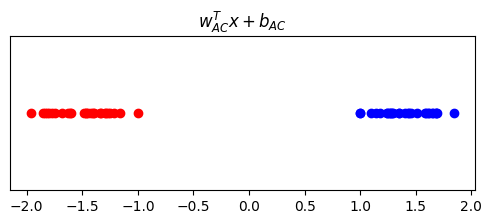

In [162]:
data = (X @ wAC.T + bAC).to_numpy()
classA = data[:29]
classB = data[29:]
# 创建一个图形
plt.figure(figsize=(6, 2))

# 在数轴上用蓝色的点画出这些值
plt.scatter(classA, [0]*len(classA), color='blue')
plt.scatter(classB, [0]*len(classB), color='red')

# 设置y轴的显示范围，这里只显示x轴，所以设置为很小的一个区间
plt.ylim(-1, 1)

# 可选：隐藏y轴的标签和刻度线
plt.yticks([])
plt.title('$w_{AC}^T x + b_{AC}$')

# 显示图形
plt.savefig('1aAC.png', bbox_inches='tight')

In [163]:
dfBC = df[(df['brand']=='B') | (df['brand']=='C')]
X = dfBC.iloc[:, 2:]
Y = dfBC.iloc[:, 0]
Y = Y.map({'B':1, 'C':-1})
X_train = X.to_numpy()
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, Y)
wBC, bBC = svm.coef_, svm.intercept_

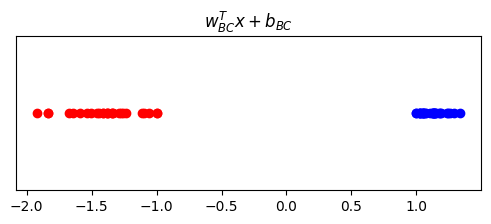

In [164]:
data = (X @ wBC.T + bBC).to_numpy()
# Y[:31]
classA = data[:31]
classB = data[31:]
# 创建一个图形
plt.figure(figsize=(6, 2))

# 在数轴上用蓝色的点画出这些值
plt.scatter(classA, [0]*len(classA), color='blue')
plt.scatter(classB, [0]*len(classB), color='red')

# 设置y轴的显示范围，这里只显示x轴，所以设置为很小的一个区间
plt.ylim(-1, 1)

# 可选：隐藏y轴的标签和刻度线
plt.yticks([])
plt.title('$w_{BC}^T x + b_{BC}$')

# 显示图形
plt.savefig('1aBC.png', bbox_inches='tight')

In [80]:
# X_train @ svm.coef_.T + svm.intercept_
print('the matrix wT of hyperplace between A and B is ')
print(wAB)
print('the intercept b of hyperplace between A and B is')
print(bAB)
print('----------------------------------------------------------------------')
print('the matrix wT of hyperplace between A and C is ')
print(wAC)
print('the intercept b of hyperplace between A and C is')
print(bAC)
print('----------------------------------------------------------------------')
print('the matrix wT of hyperplace between B and C is ')
print(wBC)
print('the intercept b of hyperplace between B and C is')
print(bBC)
# X_train.shape, svm.coef_.shape

the matrix wT of hyperplace between A and B is 
[[-0.08365963  0.0263273   0.06290964  0.00899566  0.00371821 -0.01457297
   0.00611705]]
the intercept b of hyperplace between A and B is
[0.81032823]
----------------------------------------------------------------------
the matrix wT of hyperplace between A and C is 
[[-0.0611547  -0.01665783  0.0655635   0.00745803  0.00472285  0.00479101
   0.00544715]]
the intercept b of hyperplace between A and C is
[0.64815436]
----------------------------------------------------------------------
the matrix wT of hyperplace between B and C is 
[[ 0.0720765  -0.15818992  0.04085258  0.00489641  0.00675163  0.04036443
  -0.00102341]]
the intercept b of hyperplace between B and C is
[-1.72875753]


In [167]:
print('the marginal of hyperplace between A and B is ')
print(2 / np.linalg.norm(wAB))
print('-----------------------------------------------')
print('the marginal of hyperplace between A and C is ')
print(2 / np.linalg.norm(wAC))
print('-----------------------------------------------')
print('the marginal of hyperplace between B and C is ')
print(2 / np.linalg.norm(wBC))

the marginal of hyperplace between A and B is 
18.261816747296752
-----------------------------------------------
the marginal of hyperplace between A and C is 
21.761630456581393
-----------------------------------------------
the marginal of hyperplace between B and C is 
10.912859531408142
